# **SKKU AI (Spring 2023)**
### Lab 8: Sequence Modeling with RNNs

**NOTE**
Some descriptions & codes from the below resources:
1. [Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
2. https://www.tensorflow.org/guide/keras/rnn
3. https://www.kaggle.com/mczielinski/bitcoin-historical-data
4. IT CookBook, 파이썬으로 만드는 인공지능 | 한및아카데미 | 오일석, 이진선

---

## Korean Composite Stock Price Indexes (KOSPI) Prediction
### 1. Get the data
#### KOSPI Historical Data
#### Export the historical kospi data from

https://finance.yahoo.com/quote/%5EKS11/history/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAILtHsFgd6hIiD4A-MKjjRt2yQjLd6EyL0QkAWGvetqzg590nTyt3Kop28GTiVqbafn6IPrOonmhw8UVQdHq30iICfFtiqjMXXOpMVVVNZ7VNoFx3qYZBL0DmTAk1ncne3kQUML14DZB831YKM9bltp2ATW4KkO-Y-K6ANvRfKRZ

To upload from your local drive, start with the following code:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KS11.csv to KS11 (1).csv


In [ ]:
!ls -al
!pwd

total 56
drwxr-xr-x 1 root root  4096 May  9 03:35  .
drwxr-xr-x 1 root root  4096 May  9 02:51  ..
drwxr-xr-x 4 root root  4096 May  5 23:26  .config
-rw-r--r-- 1 root root 19387 May  9 03:35 'KS11 (1).csv'
-rw-r--r-- 1 root root 19387 May  9 02:53  KS11.csv
drwxr-xr-x 1 root root  4096 May  5 23:27  sample_data
/content


data length: 248
The first 20 data:
 [[2590.129883 2602.75     2553.01001  2596.560059]
 [2586.52002  2599.110107 2579.090088 2592.27002 ]
 [2569.5      2591.570068 2546.800049 2550.080078]
 [2570.01001  2605.840088 2565.959961 2604.23999 ]
 [2624.689941 2629.199951 2593.610107 2596.580078]
 [2603.580078 2621.840088 2603.580078 2620.439941]
 [2634.75     2644.129883 2618.       2625.97998 ]
 [2576.23999  2597.790039 2568.540039 2592.340088]
 [2605.780029 2641.679932 2605.379883 2639.290039]
 [2651.629883 2653.870117 2634.290039 2647.379883]
 [2638.939941 2646.98999  2605.870117 2605.870117]
 [2621.75     2630.169922 2602.939941 2617.219971]
 [2616.98999  2641.909912 2602.01001  2612.449951]
 [2640.75     2644.709961 2631.48999  2638.050049]
 [2662.310059 2672.73999  2654.179932 2669.659912]
 [2666.879883 2685.899902 2654.320068 2685.899902]
 [2670.73999  2674.       2653.590088 2658.98999 ]
 [2679.570068 2681.51001  2663.       2670.649902]
 [2659.27002  2662.040039 2622.780029 2626.34

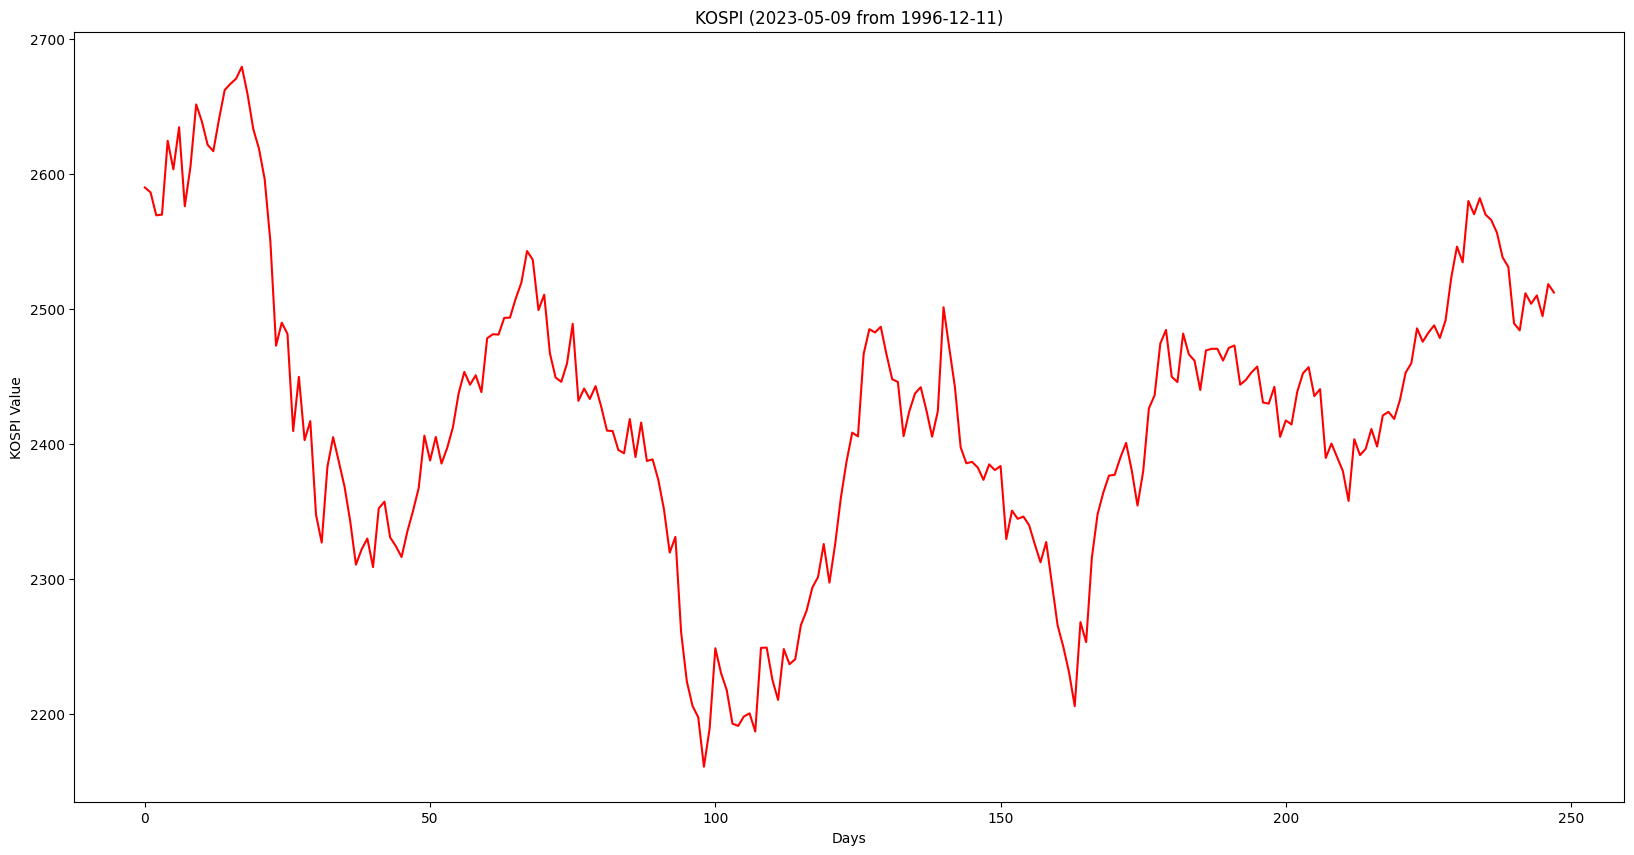

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

f = open('KS11.csv','r')
kospi_data = pd.read_csv(f,header=0)
kospi_data = kospi_data.dropna()     #drop all rows that have any NaN values
seq = kospi_data[['Open', 'High', 'Low', 'Close']].to_numpy()
data_length = len(seq)
print('data length:', data_length)
print('The first 20 data:\n', seq[:20])

# plotting
plt.figure(figsize=(20,10))
plt.plot(seq[:,0],color='red')
plt.title('KOSPI (2023-05-09 from 1996-12-11)')
plt.xlabel('Days')
plt.ylabel('KOSPI Value')
plt.show()

### Split the Dataset

In [ ]:
import numpy as np

def seq2dataset(seq, window, horizon):
  X=[]
  Y=[]
  for i in range(len(seq)-(window + horizon) + 1):
    x = seq[i:(i + window)]
    y = (seq[i + window + horizon - 1])
    X.append(x); Y.append(y)
  
  return np.array(X), np.array(Y)

w = 7 # a week
#w = 30 # a month
#w = 90 # three months
h = 1

X, Y = seq2dataset(seq,w,h)
print(X.shape, Y.shape)
print(X[0], Y[0])

(241, 7, 4) (241, 4)
[[2590.129883 2602.75     2553.01001  2596.560059]
 [2586.52002  2599.110107 2579.090088 2592.27002 ]
 [2569.5      2591.570068 2546.800049 2550.080078]
 [2570.01001  2605.840088 2565.959961 2604.23999 ]
 [2624.689941 2629.199951 2593.610107 2596.580078]
 [2603.580078 2621.840088 2603.580078 2620.439941]
 [2634.75     2644.129883 2618.       2625.97998 ]] [2576.23999  2597.790039 2568.540039 2592.340088]


In [ ]:
# Split the dataset
split_train = int(len(X)*0.7)
split_valid = int(len(X)*0.9)
# Train
#X_train = X[:split_train]; y_train=Y[:split_train]
X_train = X[:split_train, :, [0]]; y_train=Y[:split_train, [0]]
# Valid
#X_valid = X[split_train:split_valid]; y_valid=Y[split_train:split_valid]
X_valid = X[split_train:split_valid,:, [0]]; y_valid=Y[split_train:split_valid,[0]]
# Test
#X_test = X[split_valid:]; y_test=Y[split_valid:]
X_test = X[split_valid:,:, [0]]; y_test=Y[split_valid:,[0]]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(168, 7, 1) (168, 1)
(48, 7, 1) (48, 1)
(25, 7, 1) (25, 1)


Linear predictions:

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[w, 1]),
    keras.layers.Dense(1)
])

# The default learning rate is 0.001 (1e-3) and no momentum is used by default.
# https://keras.io/api/optimizers/adam/
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid))

Epoch 1/200
6/6 [==============================] - 1s 39ms/step - loss: 671720.3125 - val_loss: 593151.0625
Epoch 2/200
6/6 [==============================] - 0s 8ms/step - loss: 517867.9062 - val_loss: 449063.5938
Epoch 3/200
6/6 [==============================] - 0s 11ms/step - loss: 386539.6562 - val_loss: 328584.9062
Epoch 4/200
6/6 [==============================] - 0s 12ms/step - loss: 278657.9688 - val_loss: 231518.6250
Epoch 5/200
6/6 [==============================] - 0s 9ms/step - loss: 193083.0938 - val_loss: 156507.8750
Epoch 6/200
6/6 [==============================] - 0s 9ms/step - loss: 128019.9375 - val_loss: 101289.9375
Epoch 7/200
6/6 [==============================] - 0s 12ms/step - loss: 80953.6641 - val_loss: 62526.7656
Epoch 8/200
6/6 [==============================] - 0s 8ms/step - loss: 48732.4922 - val_loss: 36569.2891
Epoch 9/200
6/6 [==============================] - 0s 11ms/step - loss: 27899.1133 - val_loss: 20183.5703
Epoch 10/200
6/6 [====================

In [ ]:
import math
eval = model.evaluate(X_test, y_test)

math.sqrt(eval)

1/1 [==============================] - 0s 28ms/step - loss: 1032.0697


32.1258416566545

In [ ]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#####################################################
## plot utility functions
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 200, 100, 3000])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss (MSE)")
    plt.grid(True)

def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    #plt.hlines(0, 0, 100, linewidth=1)
    #plt.axis([0, n_steps + 1, -1, 1])

Learning curve:

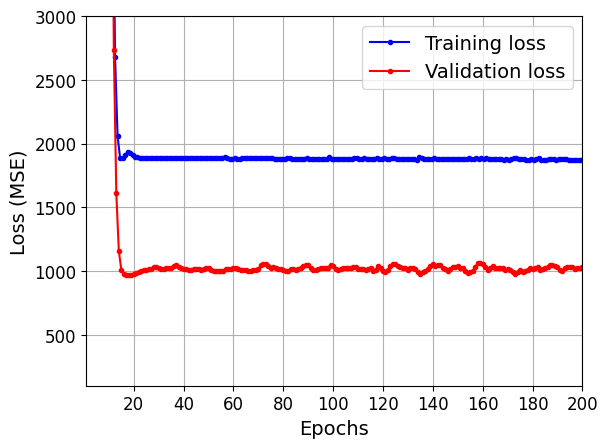

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

(48, 7, 1)
2/2 [==============================] - 0s 5ms/step
(48, 1)
gt: [2380.]
pred: [2381.2493]


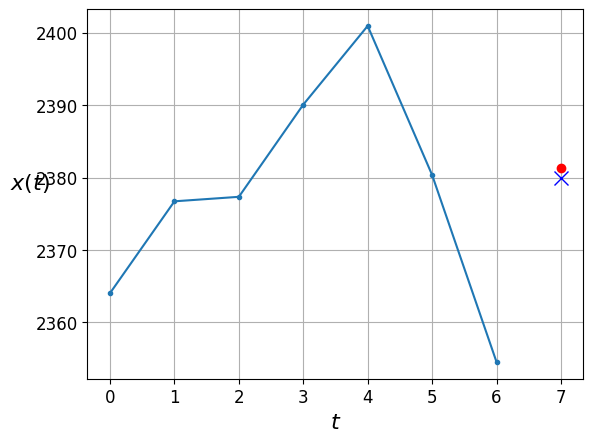

In [ ]:
n_steps = 7
#n_steps = 30

print(X_valid.shape)
y_pred = model.predict(X_valid)
print(y_pred.shape)

print("gt:", y_valid[0]) # blue
print("pred:", y_pred[0]) # red

plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

##2. Using a Simple RNNs

In [ ]:
import tensorflow as tf
from tensorflow import keras

#https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN
# Fully-connected RNN where the output is to be fed back to input.
# Args
# units, Positive integer, dimensionality of the output space.
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, activation='relu', input_shape=[None, 1]),
    keras.layers.Dense(1)
])

model.summary()

optimizer = keras.optimizers.Adam(learning_rate=0.003)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
6/6 [==============================] - 1s 54ms/step - loss: 4165477.0000 - val_loss: 3444299.2500
Epoch 2/200
6/6 [==============================] - 0s 12ms/step - loss: 2997947.5000 - val_loss: 2389037.0000
Epoch 3/200
6/6 [==============================] - 0s 10ms/step - loss: 2076897.3750 - val_loss: 1646847.0000
Epoch 4/200
6/6 [==============================] - 0s 10ms/step - loss: 1434903.5000 - val_loss: 1141047.6250
Epoch 5/200
6/6 

 ```
 Model = Sequential([
      SimpleRNN(2, input_shape=(2,2))
 ])
 ```

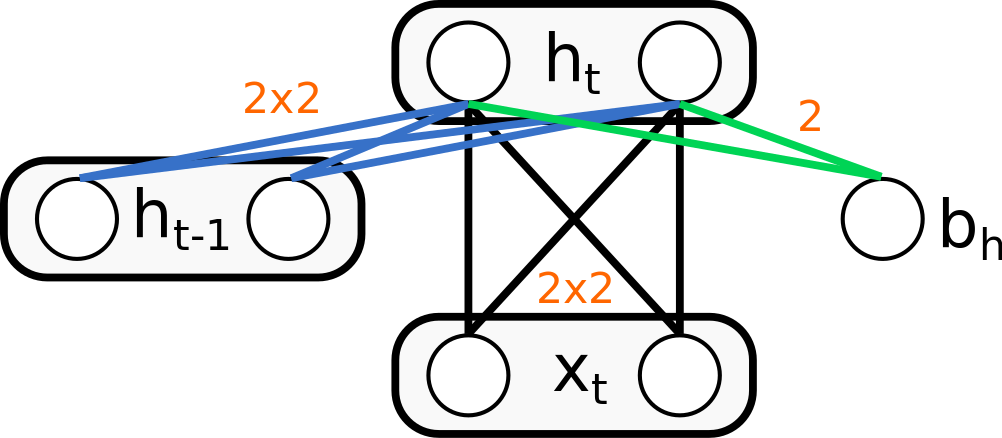

In [ ]:
import math
eval = model.evaluate(X_test, y_test)

math.sqrt(eval)

1/1 [==============================] - 0s 32ms/step - loss: 1219.5178


34.92159535682219

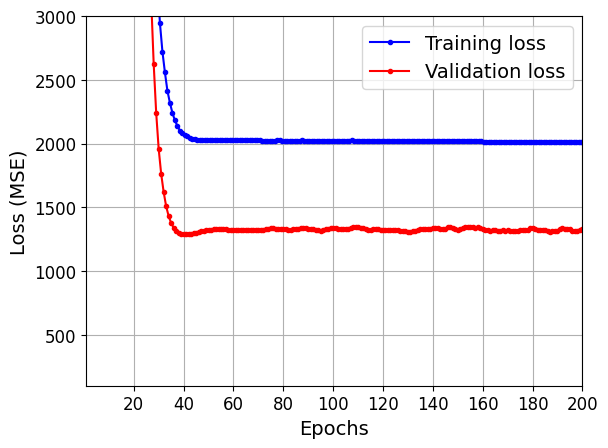

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

(48, 7, 1)
2/2 [==============================] - 0s 8ms/step
(48, 1)
gt: [2380.]
pred: [2343.5786]


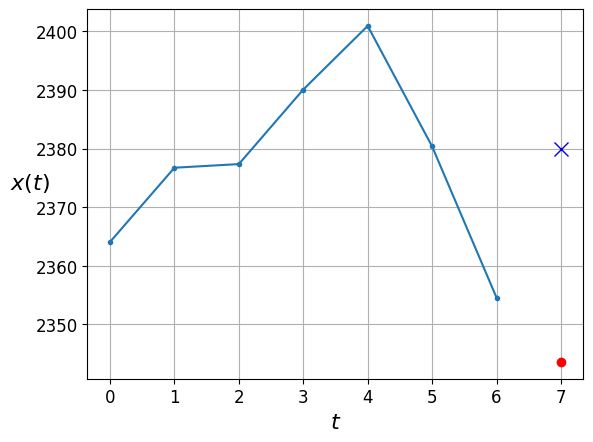

In [ ]:
#n_steps = 30
n_steps = 7

print(X_valid.shape)
y_pred = model.predict(X_valid)
print(y_pred.shape)

print("gt:", y_valid[0]) # blue
print("pred:", y_pred[0]) # red

plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [ ]:
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN
# Args
#return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence. Default: False.
#  True, it will output all the hidden states of each time steps.
model = keras.models.Sequential([
    keras.layers.SimpleRNN(128, activation='relu', return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

optimizer = keras.optimizers.Adam(learning_rate=0.0003)
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_15 (SimpleRNN)   (None, None, 128)         16640     
                                                                 
 simple_rnn_16 (SimpleRNN)   (None, 64)                12352     
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 29,057
Trainable params: 29,057
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
6/6 [==============================] - 2s 81ms/step - loss: 2903732.7500 - val_loss: 504055.2500
Epoch 2/200
6/6 [==============================] - 0s 17ms/step - loss: 208597.3594 - val_loss: 300747.0938
Epoch 3/200
6/6 [==============================] - 0s 13ms/step - loss: 104927.5703 - val_loss: 

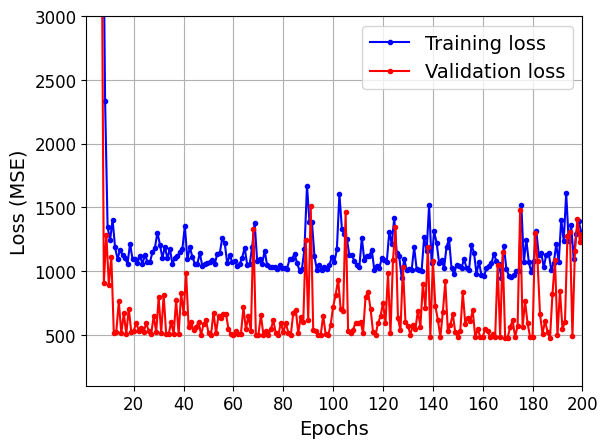

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
#plt.axis([1, 200, 500, 3000])
plt.show()

In [ ]:
import math
eval = model.evaluate(X_test, y_test)

math.sqrt(eval)

1/1 [==============================] - 0s 33ms/step - loss: 1276.0249


35.721490763177144

(48, 7, 1)


2/2 [==============================] - 0s 6ms/step
(48, 1)
gt: [2380.]
pred: [2343.5073]


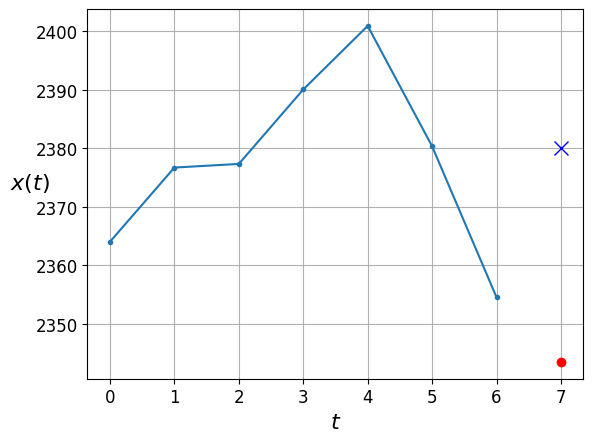

In [ ]:
#n_steps = 30
n_steps = 7

print(X_valid.shape)
y_pred = model.predict(X_valid)
print(y_pred.shape)

print("gt:", y_valid[0]) # blue
print("pred:", y_pred[0]) # red

plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

##4. LSTMs

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.LSTM(128, activation='relu', input_shape=[None, 1]),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.003)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid))

Epoch 1/200
6/6 [==============================] - 3s 72ms/step - loss: 6300523.0000 - val_loss: 5801286.5000
Epoch 2/200
6/6 [==============================] - 0s 25ms/step - loss: 5140149.0000 - val_loss: 4332254.5000
Epoch 3/200
6/6 [==============================] - 0s 21ms/step - loss: 3623528.0000 - val_loss: 1976066.0000
Epoch 4/200
6/6 [==============================] - 0s 23ms/step - loss: 1062953.6250 - val_loss: 4403.4878
Epoch 5/200
6/6 [==============================] - 0s 24ms/step - loss: 241715.1406 - val_loss: 25235.4629
Epoch 6/200
6/6 [==============================] - 0s 23ms/step - loss: 54587.3945 - val_loss: 24805.4473
Epoch 7/200
6/6 [==============================] - 0s 24ms/step - loss: 8002.2573 - val_loss: 4549.0391
Epoch 8/200
6/6 [==============================] - 0s 24ms/step - loss: 51216.0938 - val_loss: 32972.1836
Epoch 9/200
6/6 [==============================] - 0s 23ms/step - loss: 66170.8594 - val_loss: 99121.2422
Epoch 10/200
6/6 [================

In [ ]:
import math
eval = model.evaluate(X_test, y_test)

math.sqrt(eval)

1/1 [==============================] - 0s 98ms/step - loss: 1680.8890


40.998646783594424

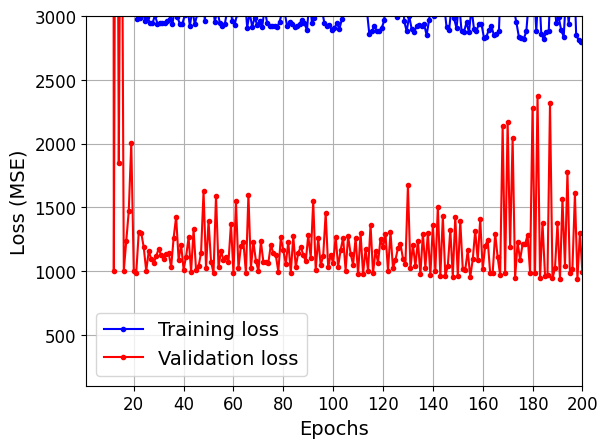

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

(48, 7, 1)
2/2 [==============================] - 0s 9ms/step
(48, 1)
gt: [2380.]
pred: [2375.2144]


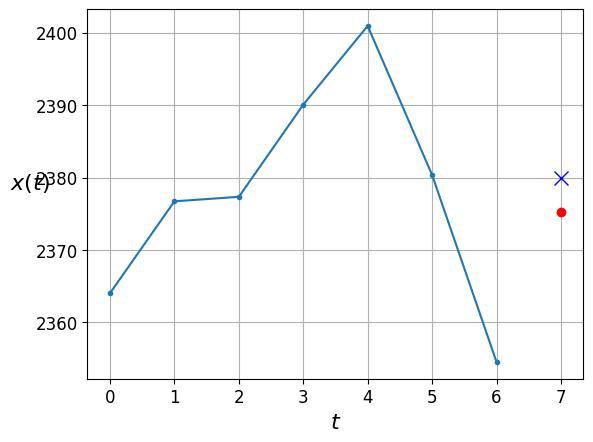

In [ ]:
#n_steps = 30
n_steps = 7

print(X_valid.shape)
y_pred = model.predict(X_valid)
print(y_pred.shape)

print("gt:", y_valid[0]) # blue
print("pred:", y_pred[0]) # red

plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

## Forecasting Several Steps Ahead

In [ ]:
def seq2dataset_long(seq, window, horizon):
  X=[]
  Y=[]
  for i in range(len(seq)-(window + horizon) + 1):
    x = seq[i:(i + window)]
    y = seq[i + window:i + window + horizon]
    X.append(x); Y.append(y)
  return np.array(X), np.array(Y)

w = 30
h = 7

X, Y = seq2dataset_long(seq,w,h)
print(X.shape, Y.shape)
#print(X[0], Y[0])

# Split the dataset
split_train = int(len(X)*0.8)

# Train
X_train = X[:split_train, :, [0]]; y_train=Y[:split_train, :, [0]]
# Valid
X_valid = X[split_train:,:, [0]]; y_valid=Y[split_train:,:,[0]]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(212, 30, 4) (212, 7, 4)
(169, 30, 1) (169, 7, 1)
(43, 30, 1) (43, 7, 1)


In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.LSTM(128, activation='relu', input_shape=[None, 1]),
    keras.layers.Dense(7)
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid))

Epoch 1/200
6/6 [==============================] - 2s 119ms/step - loss: 7641768.0000 - val_loss: 6864722.0000
Epoch 2/200
6/6 [==============================] - 1s 93ms/step - loss: 5678240.5000 - val_loss: 5457257.5000
Epoch 3/200
6/6 [==============================] - 1s 98ms/step - loss: 5727461.0000 - val_loss: 5925644.5000
Epoch 4/200
6/6 [==============================] - 1s 88ms/step - loss: 5137298.0000 - val_loss: 5293307.0000
Epoch 5/200
6/6 [==============================] - 1s 101ms/step - loss: 4777394.0000 - val_loss: 4875862.5000
Epoch 6/200
6/6 [==============================] - 1s 98ms/step - loss: 4439048.5000 - val_loss: 5404902.5000
Epoch 7/200
6/6 [==============================] - 0s 61ms/step - loss: 4089201.2500 - val_loss: 4045491.7500
Epoch 8/200
6/6 [==============================] - 0s 50ms/step - loss: 3183187.2500 - val_loss: 3233553.7500
Epoch 9/200
6/6 [==============================] - 0s 50ms/step - loss: 2419359.5000 - val_loss: 2164339.7500
Epoch 10

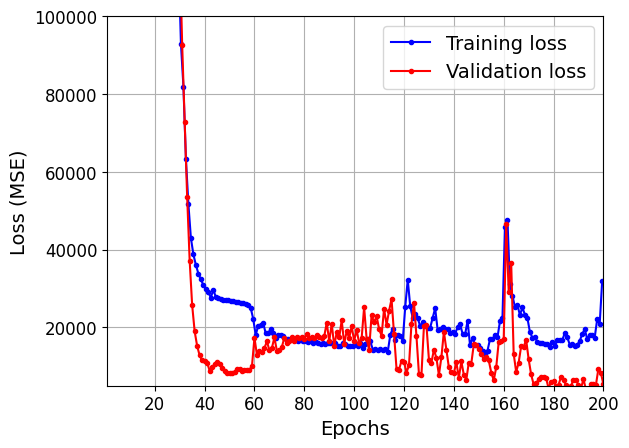

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.axis([1, 200, 5000, 100000])
plt.show()

In [ ]:
print(y_valid.shape)
y_pred = model.predict(X_valid)
print(y_pred.shape)

(43, 7, 1)


2/2 [==============================] - 0s 17ms/step
(43, 7)


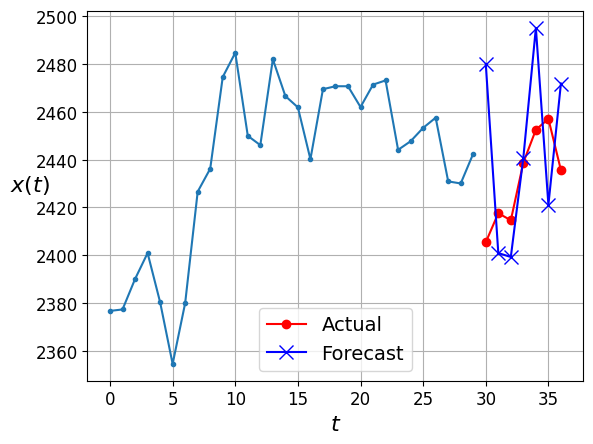

In [ ]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :], "bx-", label="Forecast", markersize=10)
    #plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(loc='lower center',fontsize=14)

plot_multiple_forecasts(X_valid, y_valid, y_pred)

---
## (Simple & Easy!) Lab activity 8

### Write your sequential modeling code to forecast the closing value of the KOSDAQ